### Exercise 04.2

The Molecular Dynamics code we have provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.
Take the MD code and include block averaging: 

Divide the <span style="color:blue"><font face="Courier">nstep</font></span> of the simulation into <span style="color:blue"><font face="Courier">nblocks</font></span>. By exploiting these blocks, <span style="color:red">code the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$ and $T$</span>, that will be written in new specific output files, for example: <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font></span>

Il programma utilizzato è identico a quello dell'esercizio 4.1 con la sola modifica che in fase di inizializazione della simulazione viene letto dal file *input.dat* anche il valore della variabile *blocklength*. Tale variabile stabilisce la lunghezza di ciasun blocco, essa viene passata alla funzione *Datablocking* implementata nel file *datablockingspecial.cpp*. Questa funzione legge i file in cui sono stampati i valori istantanei di un osservabile, li suddivide in blocchi lunghi *blocklength*, ne calcola la media per ciascun blocco e fa il data bocking dei valori medi.

I grafici riportati provengono dalla simulazione di un solido **non equilibrata**:

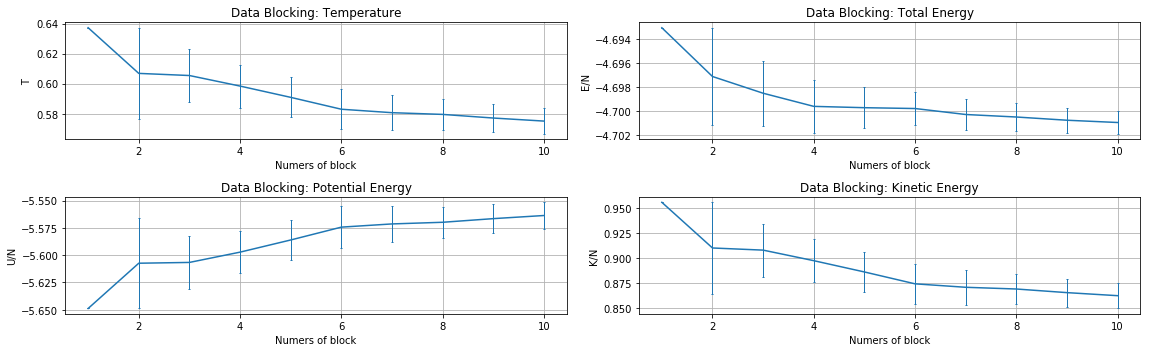

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16, 5))
er=1
fileinput = ["./code/risultati/ave_temp.dat","./code/risultati/ave_etot.dat","./code/risultati/ave_epot.dat","./code/risultati/ave_ekin.dat"]
Label = ["Data Blocking: Temperature", "Data Blocking: Total Energy","Data Blocking: Potential Energy","Data Blocking: Kinetic Energy"]
YLabel = ["T","E/N","U/N","K/N"]

for i in range(4):
    plt.subplot(2,2,i+1)
    x, f, error = np.loadtxt(fileinput[i], usecols=(0,1,2), delimiter=' ', unpack='true')
    plt.errorbar(x,f,yerr=error, errorevery=er, elinewidth=1, capsize=1, ms=3, label=Label[i])
    plt.xlabel('Numers of block')
    plt.ylabel(YLabel[i])
    plt.title(Label[i])
    plt.grid(True)

plt.tight_layout()
plt.show()